<a href="https://colab.research.google.com/github/hang-1n-there/pytorch_learn/blob/main/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [ ]:
df = pd.DataFrame(california.data , columns = california.feature_names)
df['Target'] = california.target
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


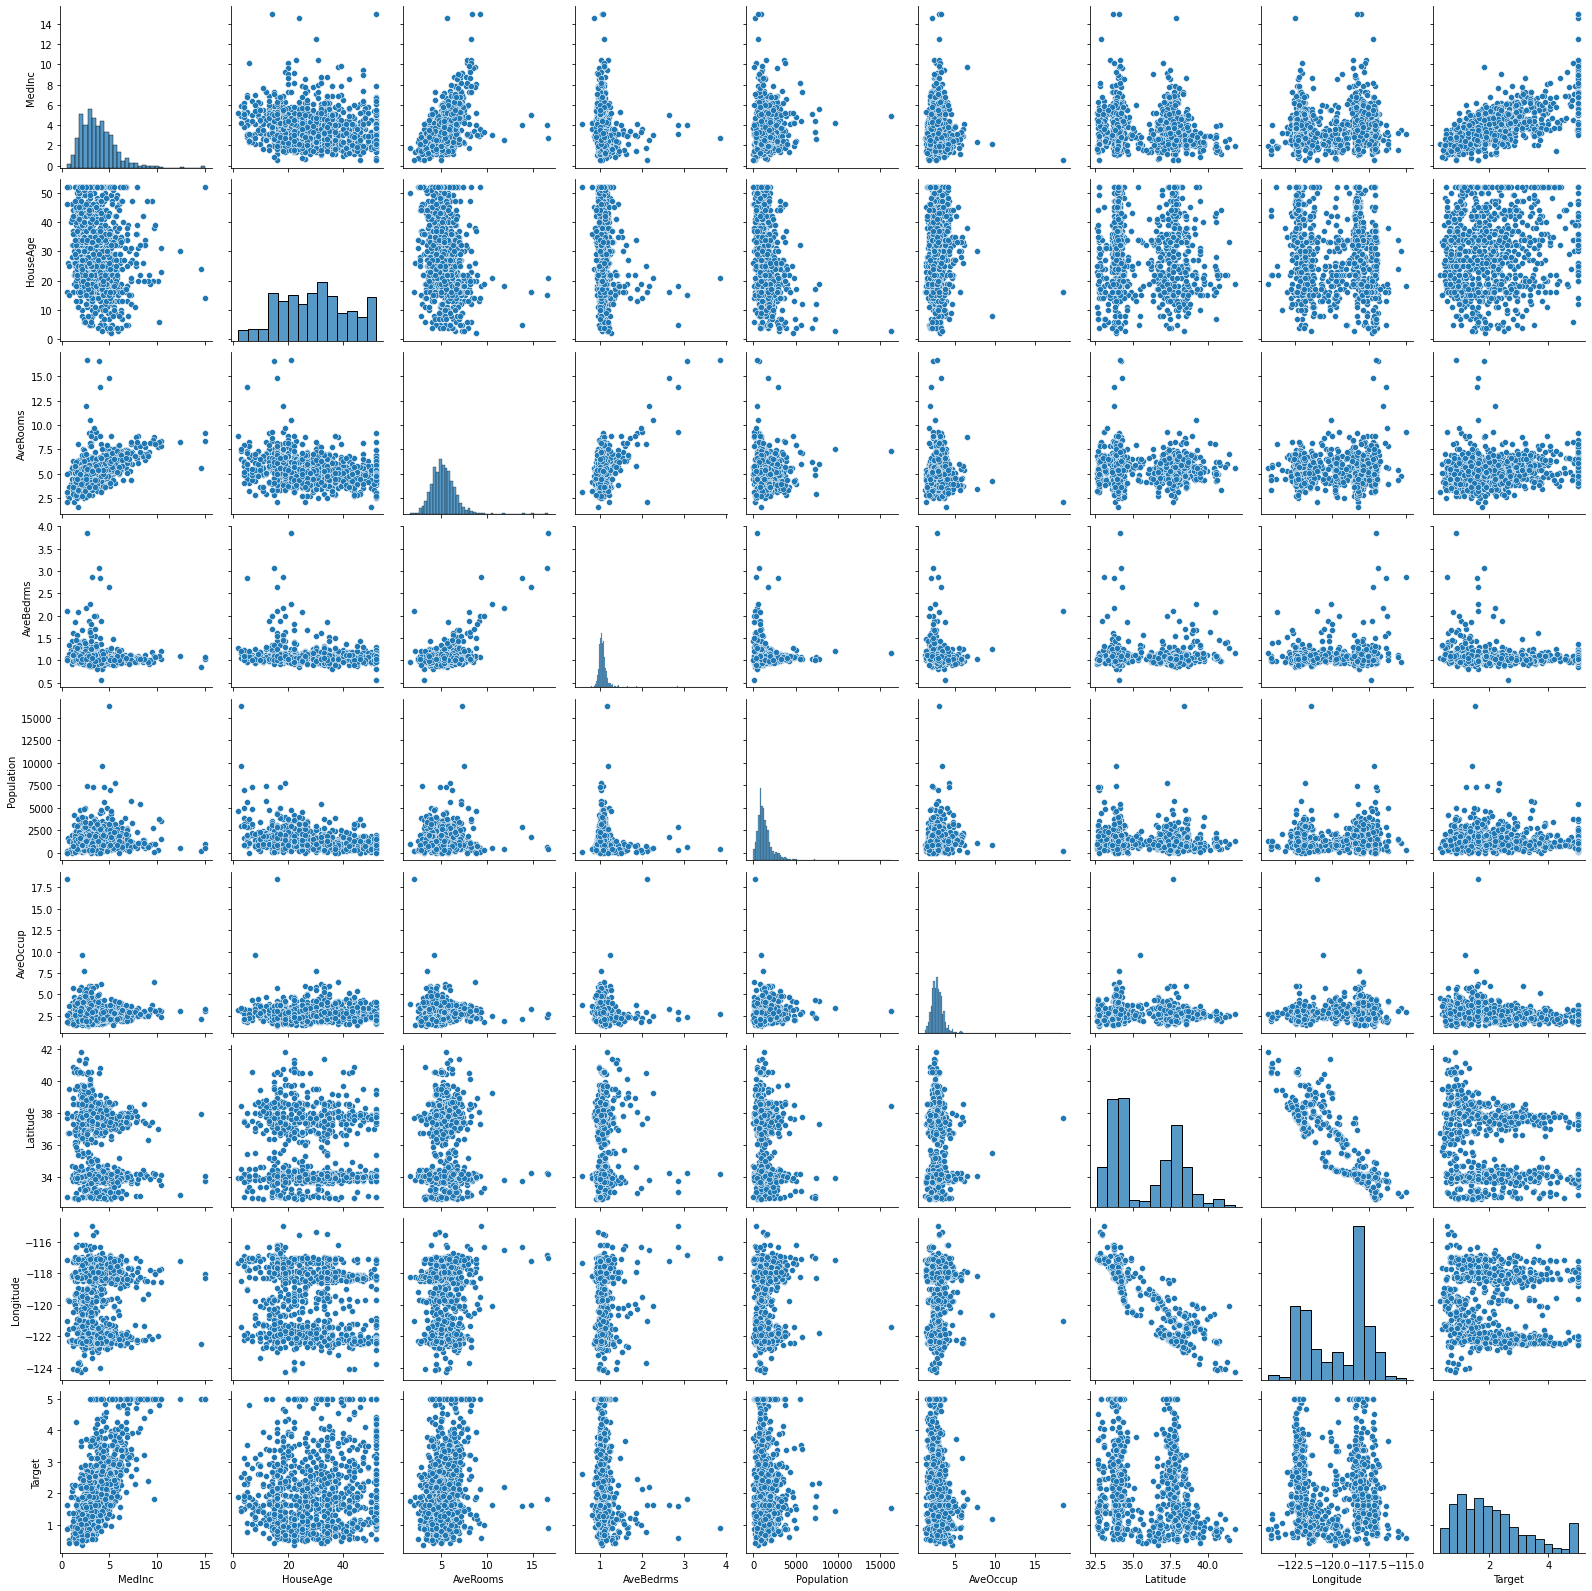

In [ ]:
sns.pairplot(df.sample(1000))
plt.show()

In [ ]:
scaler = StandardScaler()
scaler.fit(df.values[:,:-1])
df.values[:,:-1] = scaler.transform(df.values[:,:-1])

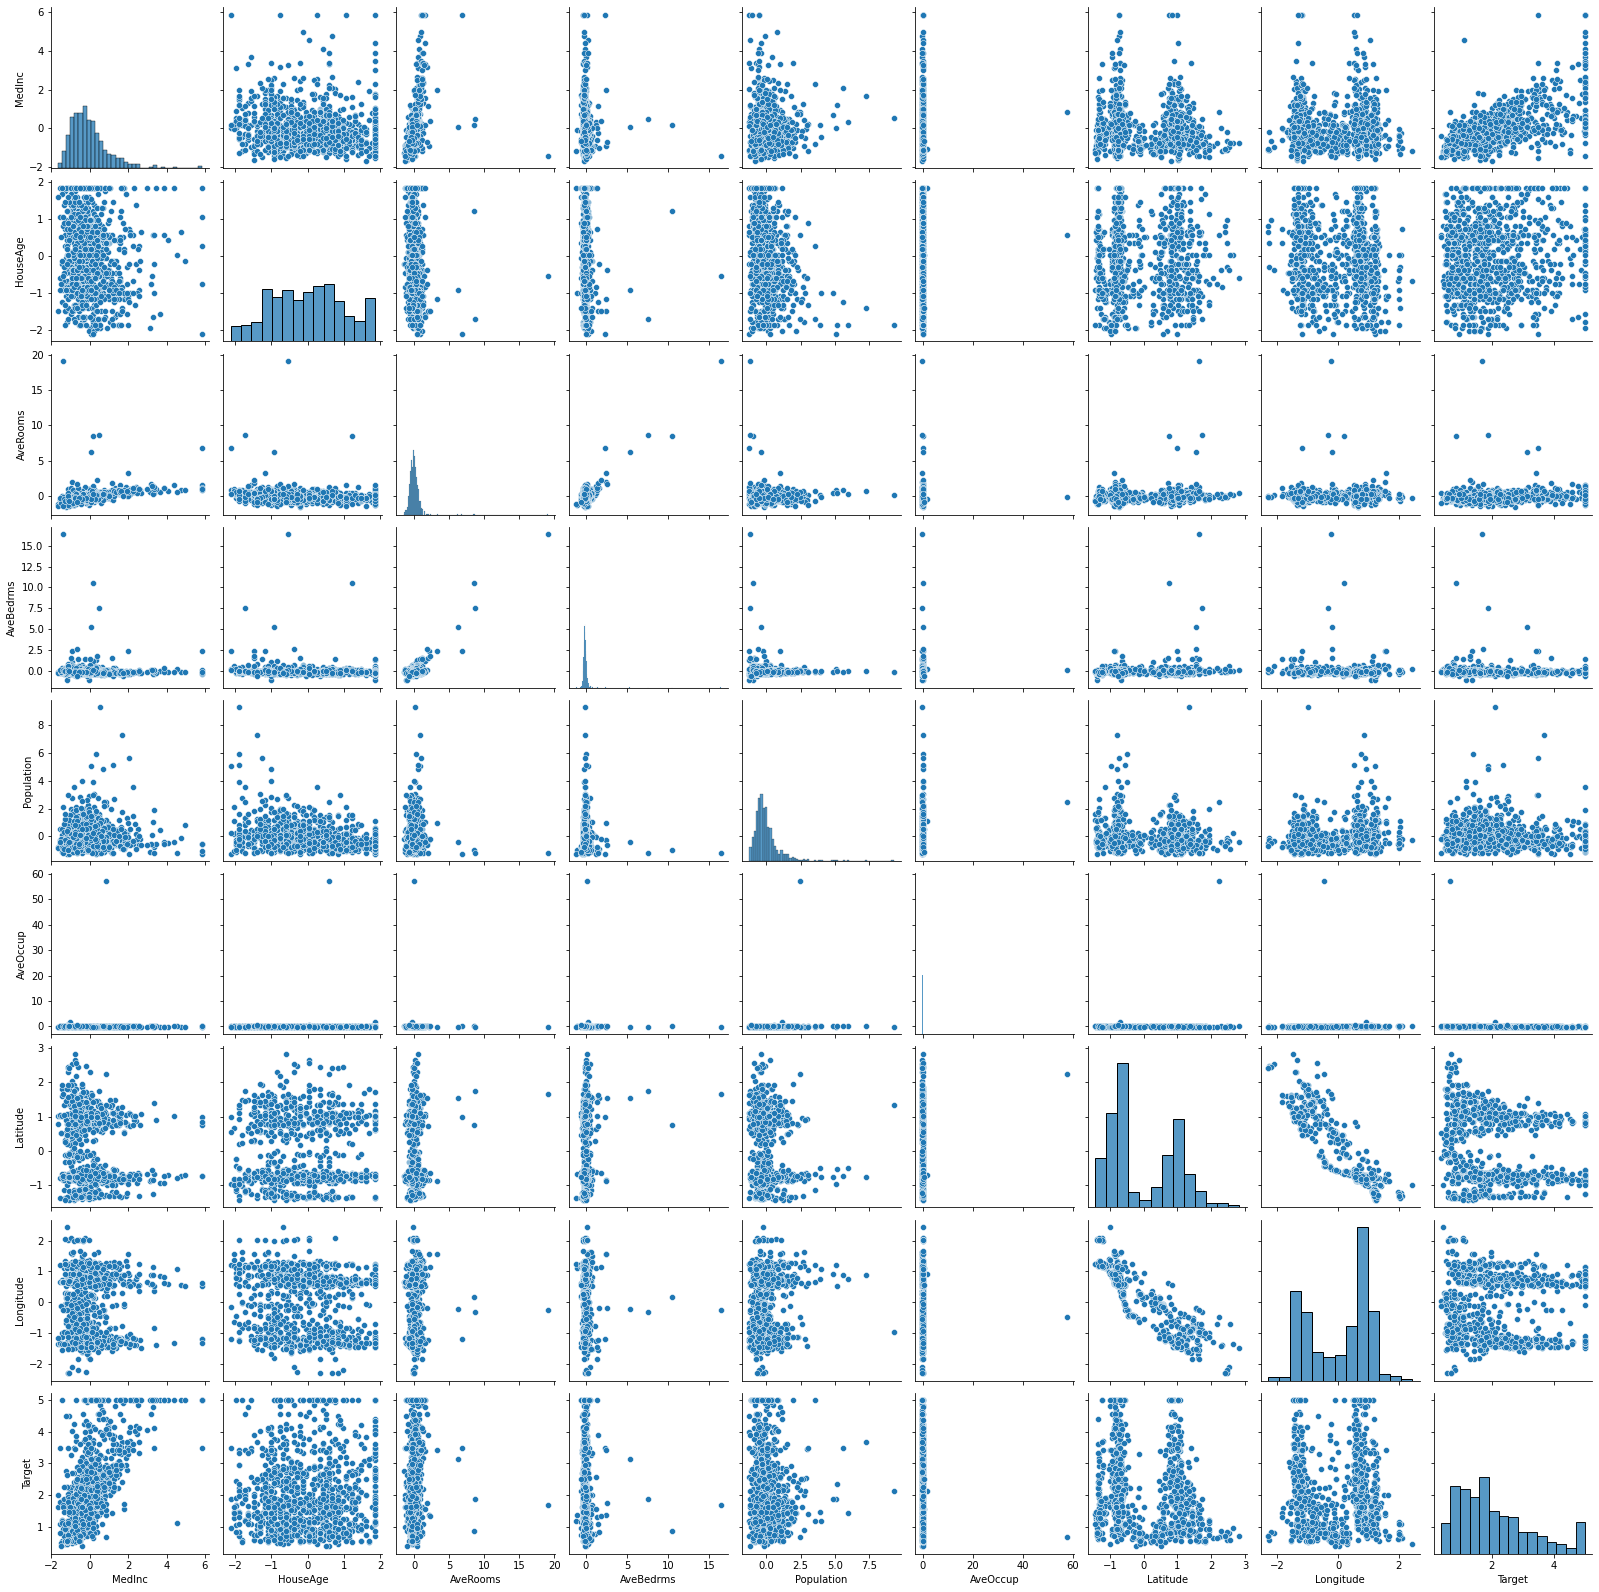

In [ ]:
sns.pairplot(df.sample(1000))
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [ ]:
data = torch.from_numpy(df.values).float()
data.shape

torch.Size([20640, 9])

In [ ]:
x = data[:,:-1]
y = data[:,-1:]

print(x.shape, y.shape)

torch.Size([20640, 8]) torch.Size([20640, 1])


In [ ]:
n_epochs = 4000
batch_size = 256
print_interval = 200
learning_rate = 1e-2

In [ ]:
model = nn.Sequential(
    nn.Linear(x.size(-1),6),
    nn.LeakyReLU(),
    nn.Linear(6,5),
    nn.LeakyReLU(),
    nn.Linear(5,4),
    nn.LeakyReLU(),
    nn.Linear(4,3),
    nn.LeakyReLU(),
    nn.Linear(3,y.size(-1))
)
model

Sequential(
  (0): Linear(in_features=8, out_features=6, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=6, out_features=5, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=5, out_features=4, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=4, out_features=3, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=3, out_features=1, bias=True)
)

In [ ]:
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [ ]:
# |x| = (total_size * input_dim)
# |y| = (total_size * output_dim)

for i in range(n_epochs):
  indices = torch.randperm(x.size(0))
  x_ = torch.index_select(x, dim=0, index=indices)
  y_ = torch.index_select(y, dim=0, index=indices)

  x_ = x_.split(batch_size, dim=0)
  y_ = y_.split(batch_size, dim=0)
  # |x| = (batch_size * input_dim)
  # |x| = (total_size * output_dim)

  y_hat = []
  total_loss = 0

  for x_i, y_i in zip(x_,y_):

    y_hat_i = model(x_i)
    loss = F.mse_loss(y_hat_i,y_i)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss += float(loss)
    y_hat += [y_hat_i]

  total_loss=total_loss / len(x_)
  if (i+1) % print_interval == 0:
    print('Epoch : {:4d} Loss : {:.4e}'.format(i+1,total_loss))
  
y_hat = torch.cat(y_hat,dim=0)
y = torch.cat(y_,dim=0)

# | y_hat , y | = (total_size * output_size)

Epoch :  200 Loss : 3.1274e-01
Epoch :  400 Loss : 3.0079e-01
Epoch :  600 Loss : 2.9682e-01
Epoch :  800 Loss : 2.9775e-01
Epoch : 1000 Loss : 2.9533e-01
Epoch : 1200 Loss : 2.9386e-01
Epoch : 1400 Loss : 2.9320e-01
Epoch : 1600 Loss : 2.9257e-01
Epoch : 1800 Loss : 2.9240e-01
Epoch : 2000 Loss : 2.9262e-01
Epoch : 2200 Loss : 2.9168e-01
Epoch : 2400 Loss : 2.9213e-01
Epoch : 2600 Loss : 2.9183e-01
Epoch : 2800 Loss : 2.9193e-01
Epoch : 3000 Loss : 2.9080e-01
Epoch : 3200 Loss : 2.9053e-01
Epoch : 3400 Loss : 2.9038e-01
Epoch : 3600 Loss : 2.8980e-01
Epoch : 3800 Loss : 2.9022e-01
Epoch : 4000 Loss : 2.8998e-01


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


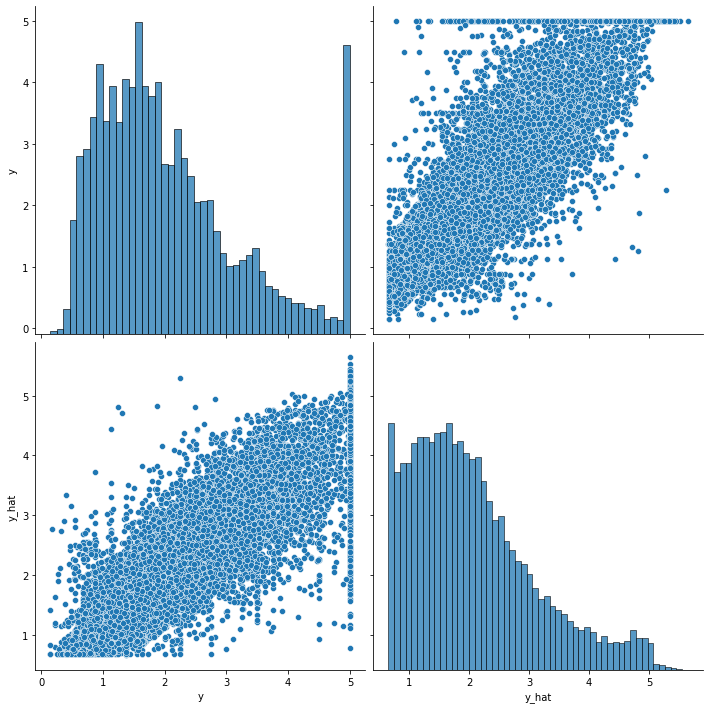

In [ ]:
df = pd.DataFrame(torch.cat([y,y_hat], dim=1).detach().numpy(), columns = ['y','y_hat'])
sns.pairplot(df,size=5)
plt.show()